In [2]:
#import bacco
import baccoemu

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
#import plotter
import utils
# import run_inference as rinf
# import moment_network as mn

%load_ext autoreload
%autoreload 2

2024-03-19 12:48:09.588888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [4]:
tag_fit = '_cosmolib_err1p_kmax0.1'

In [5]:
param_names_all = ['omega_cold', 'sigma_8', 'h', 'omega_baryon', 'n_s', 'seed']
param_names = ['omega_cold', 'sigma_8', 'h']
param_names_fixed = [name for name in param_names_all if name not in param_names]
idxs_param_names = [param_names_all.index(name) for name in param_names]

tag_pk = '_b0000'
dir_pks = f'../data/pks_cosmolib/pks{tag_pk}'

bias_params = np.loadtxt(f'{dir_pks}/bias_params.txt')

n_lib = 500
dir_mocks = '../data/cosmolib'
theta = []
Pk = []
Pk_lin = []
Pk_nl = []
gaussian_error_pk = []
param_dict_fixed = {}
for idx_LH in range(n_lib):
    fn_fields = f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy'
    fn_params = f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt'
    fn_pk = f'{dir_pks}/pk_{idx_LH}.npy'
    
    pk_obj = np.load(fn_pk, allow_pickle=True).item()
    Pk.append(pk_obj['pk'])
    Pk_lin.append(pk_obj['pk_theory_lin'])
    Pk_nl.append(pk_obj['pk_theory_nl'])
    gaussian_error_pk.append(pk_obj['pk_gaussian_error'])
    
    param_vals = np.loadtxt(fn_params)
    if idx_LH==0:
        for name in param_names_fixed:
            param_dict_fixed[name] = param_vals[param_names_all.index(name)]
    theta.append(param_vals[idxs_param_names])

Pk = np.array(Pk)
Pk_lin = np.array(Pk_lin)
Pk_nl = np.array(Pk_nl)
theta = np.array(theta)
gaussian_error_pk = np.array(gaussian_error_pk)

kk = pk_obj['k'] # all ks should be same so just grab one

In [6]:
pk_obj['pk_theory_lin'], pk_obj['pk_theory_nl']

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [7]:
#emu = baccoemu.Lbias_expansion(verbose=False)
fn_emu = '/dipc_storage/cosmosims/data_share/lbias_emulator/lbias_emulator2.0.0'
emu_lbias = baccoemu.Lbias_expansion(verbose=False, 
                               nonlinear_emu_path=fn_emu,
                               nonlinear_emu_details='details.pickle',
                               nonlinear_emu_field_name='NN_n',
                               nonlinear_emu_read_rotation=False)
cosmo_params = utils.setup_cosmo_emu()

Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-03-19 12:48:30.000033: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_thread

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using 

Nonlinear l-bias emulator loaded in memory.
HIIII
Setting up emulator cosmology


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
emulator = baccoemu.Matter_powerspectrum(verbose=False)

HIIII


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0

In [ ]:
cosmo_params = utils.setup_cosmo_emu(cosmo='quijote')

Setting up emulator cosmology


In [10]:
param_names_2_emu_param_names = {'sigma_8': 'sigma8_cold',
                                 'omega_cold': 'omega_cold',
                                 'h': 'hubble',
                                 'n_s': 'ns'}
emu_param_names = [param_names_2_emu_param_names[param_name] for param_name in param_names]

/scratch/kstoreyf/muchisimocks/notebooks/ipykernel_369253/2182937087.py:25: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(k, (pk_lin_cold-Pk[iLH])/Pk[iLH], ls='-', alpha=0.5, color=color_pk_cold)
/scratch/kstoreyf/muchisimocks/notebooks/ipykernel_369253/2182937087.py:26: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(k, (pk_lin_total-Pk[iLH])/Pk[iLH], ls='--', alpha=0.5, color=color_pk_tot)
/scratch/kstoreyf/muchisimocks/notebooks/ipykernel_369253/2182937087.py:27: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(k, (pk_lbias-Pk[iLH])/Pk[iLH], ls=':', alpha=0.5, color=color_pk_lbias)


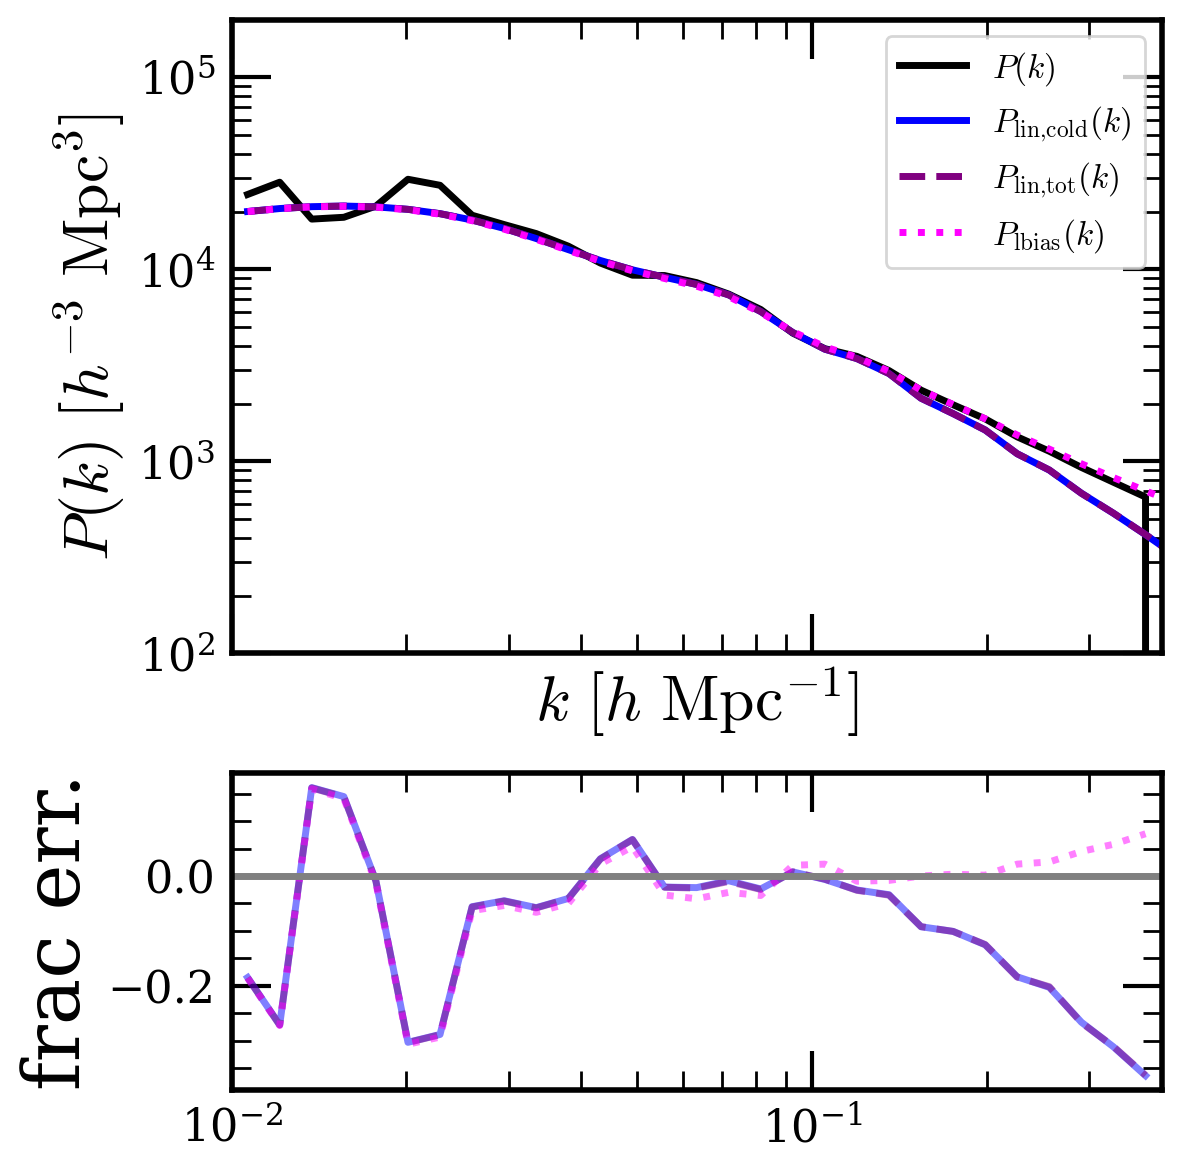

In [19]:
nrows, ncols = 2, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,6), sharex=True, height_ratios=[2,1])
plt.subplots_adjust(hspace=0)
ax, ax1 = axarr

color_pk, color_pk_cold, color_pk_tot, color_pk_lbias = 'black', 'blue', 'purple', 'magenta'

n_plot = 1
for iLH in range(n_plot):
    ax.loglog(kk, Pk[iLH], label=r'$P(k)$', color=color_pk)
    for pp in range(len(param_names)):
        cosmo_params[emu_param_names[pp]] = theta[iLH][pp]
        
    k, pk_lin_cold = emulator.get_linear_pk(k=kk, cold=True, **cosmo_params)
    k, pk_lin_total = emulator.get_linear_pk(k=kk, cold=False, **cosmo_params)
    ax.loglog(k, pk_lin_cold, label=r'$P_\text{lin,cold}(k)$', color=color_pk_cold)
    ax.loglog(k, pk_lin_total, label=r'$P_\text{lin,tot}(k)$', ls='--', color=color_pk_tot)
    
    k, pk_lbias, _ = emu_lbias.get_galaxy_real_pk(bias=bias_params, k=kk, 
                                                        **cosmo_params)
    ax.loglog(k, pk_lbias, label=r'$P_\text{lbias}(k)$', ls=':', color=color_pk_lbias)

    #ax.loglog(kk, Pk_lin[iLH], label=r'$P_\text{lin}(k)$')
    #ax.loglog(kk, Pk_nl[iLH], label=r'$P_\text{nl}(k)$')
    ax1.plot(k, (pk_lin_cold-Pk[iLH])/Pk[iLH], ls='-', alpha=0.5, color=color_pk_cold)
    ax1.plot(k, (pk_lin_total-Pk[iLH])/Pk[iLH], ls='--', alpha=0.5, color=color_pk_tot)
    ax1.plot(k, (pk_lbias-Pk[iLH])/Pk[iLH], ls=':', alpha=0.5, color=color_pk_lbias)


ax1.axhline(0, color='grey')

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)
ax1.set_ylabel('frac err.')
ax.set_xlim(1e-2, 0.4)
ax.set_ylim(1e2, 2e5)

ax.legend(fontsize=12)

mpl.pyplot.tight_layout()
mpl.pyplot.show()

In [6]:
Seed=1915
npart = 512
boxsize = 1000.

bacco.configuration.update({'pk':{'boltzmann_solver': 'CLASS'}})
bacco.configuration.update({'pknbody' : {'ngrid'  :  npart}})
bacco.configuration.update({'scaling' : {'disp_ngrid' : npart}})

# CHOOSE COSMOLOGY

Omega0 = 0.3175
OmegaBaryon = 0.049
HubbleParam = 0.6711
ns = 0.9624
sigma8 = 0.834
expfactor = 1.

pars_arr = np.array([Omega0, OmegaBaryon, HubbleParam, ns, sigma8])

## Start cosmology class

pars = {'omega_cdm':Omega0-OmegaBaryon, 'omega_baryon':OmegaBaryon, 'hubble':HubbleParam, 
        'neutrino_mass':0.0, 'sigma8':sigma8, 'ns':ns, 'expfactor':expfactor}
cosmo = bacco.Cosmology(**pars) #bacco.Cosmology(**bacco.cosmo_parameters.Planck13)  
print(cosmo)


# CREATE A ZA SIMULATION

sim, disp_field = bacco.utils.create_lpt_simulation(cosmo, boxsize, Nmesh=npart, Seed=Seed,
                                                    FixedInitialAmplitude=False,InitialPhase=0, 
                                                    expfactor=1, LPT_order=1, order_by_order=None,
                                                    phase_type=1, ngenic_phases=True, return_disp=True, 
                                                    sphere_mode=0)

2024-03-19 00:10:40,040 bacco.cosmo :    initialization took 0.000 secs
2024-03-19 00:10:40,107 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-03-19 00:10:40,108 bacco.sims : Initialising simulation Default
2024-03-19 00:10:40,109 bacco.sims : ...done in 0.00105 s


-----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.2685, Omega_b = 0.049, Omega_de = 0.6825, 
Hubble=0.6711, Sigma_8=0.834, A_s=None, ns=0.9624, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1, wa=0
- Power Spectrum: CLASS,   Expansion Factor: 1.0,   ReNormalizeInputSpectrum: True
-----------------------------------------------


2024-03-19 00:10:41,170 bacco.cosmo :    computed CLASS power spectrum at z=0.00 in 0.695 secs
2024-03-19 00:10:41,171 bacco.cosmo :    created Pk(z=0) tab from k 0.0006710999999999998 to 100000.0 h/Mpc
2024-03-19 00:10:49,342 bacco.cosmo :    computed CLASS power spectrum at z=0.00 in 0.485 secs
2024-03-19 00:10:49,388 bacco.cosmo :    created Pk(z=0) tab from k 0.0006710999999999998 to 100000.0 h/Mpc


bacco.lss_scaler : 294 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =1915 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =1915 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 


2024-03-19 00:10:56,140 bacco.scaler : Adding displacement field with a vel-factor=52.941596


bacco.lss_scaler:  Adding LSS displacement: vel_factor=52.941596 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [8]:
lin_field = sim.linear_field[0]
print(lin_field.shape)

(512, 512, 512)


In [15]:
box_size = 1000.0

k_min = 0.01
k_max = 0.4
n_bins = 30
log_binning = True
k = np.logspace(np.log10(k_min),np.log10(k_max),n_bins)

args_power = {'ngrid':512,
            'box':box_size,
            'cosmology':cosmo,
            'interlacing':False,
            'kmin':k_min,
            'kmax':k_max,
            'nbins':n_bins,
            'correct_grid':True,
            'log_binning':log_binning,
            'deposit_method':'cic',
            'compute_correlation':False,
            'zspace':False,
            'compute_power2d':False}

bacco.configuration.update({'number_of_threads': 8})


In [20]:
tracer_field = lin_field/512**3

# NOTE assumes tracer field is already normalized!
pk_lin = bacco.statistics.compute_crossspectrum_twogrids(
                    grid1=tracer_field,
                    grid2=tracer_field,
                    normalise_grid1=False,
                    normalise_grid2=False,
                    deconvolve_grid1=False,
                    deconvolve_grid2=False,
                    **args_power)

2024-03-19 00:21:31,274 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 8; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 4.51117e-19 (grid1) 4.51117e-19 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.883659 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.272118 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000155 secs
bacco.power : Deallocating arrays


2024-03-19 00:21:38,959 bacco.statistics :  ...done in 7.69 s


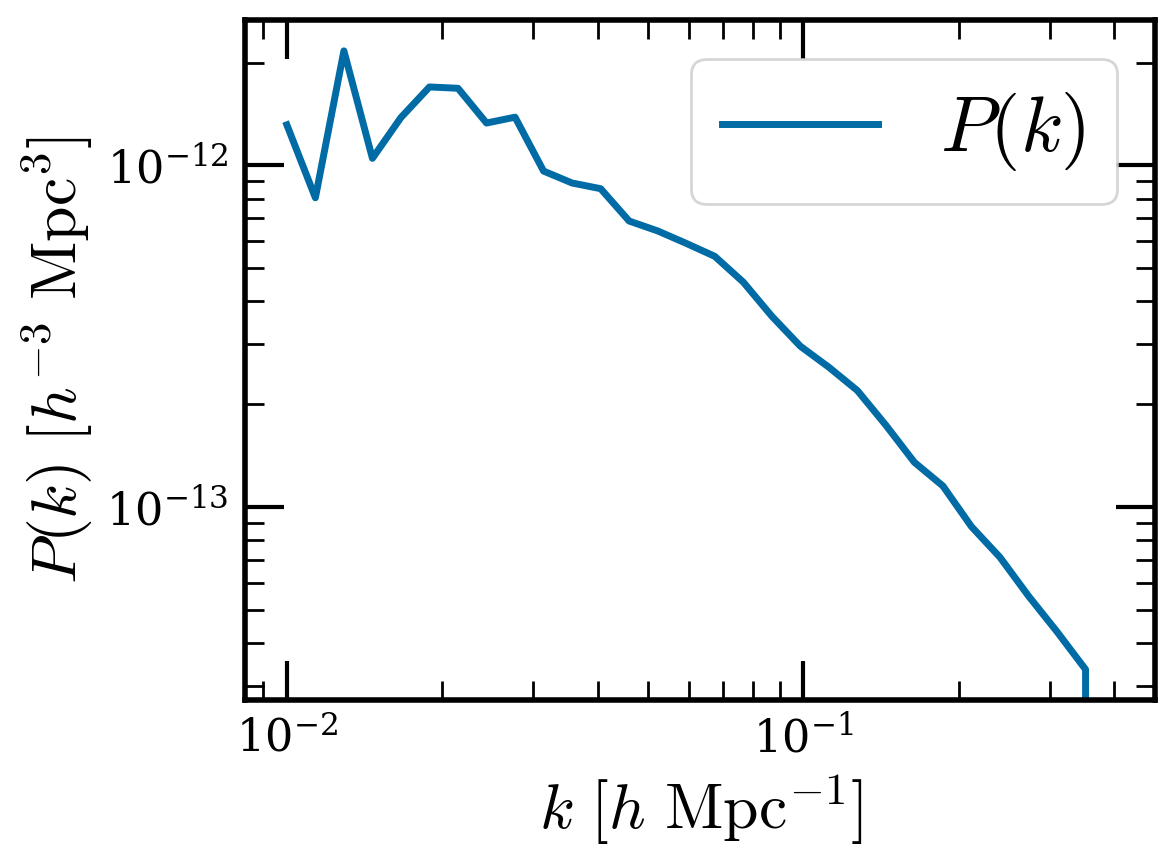

In [21]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 4.5))

ax.loglog(k, pk_lin['pk'], label=r'$P(k)$')

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

# ax.set_xlim(1e-2, 0.4)
# ax.set_ylim(1e3, 5e5)

plt.legend()

mpl.pyplot.tight_layout()
mpl.pyplot.show()